<a href="https://colab.research.google.com/github/fertr98/4GeeksAcademy/blob/master/Time_series_(sales_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [14]:
!pip install pmdarima==2.0.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 17.0 MB/s eta 0:00:00


In [2]:
#load data
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv")
total_data.head()

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633


In [3]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


## No null data

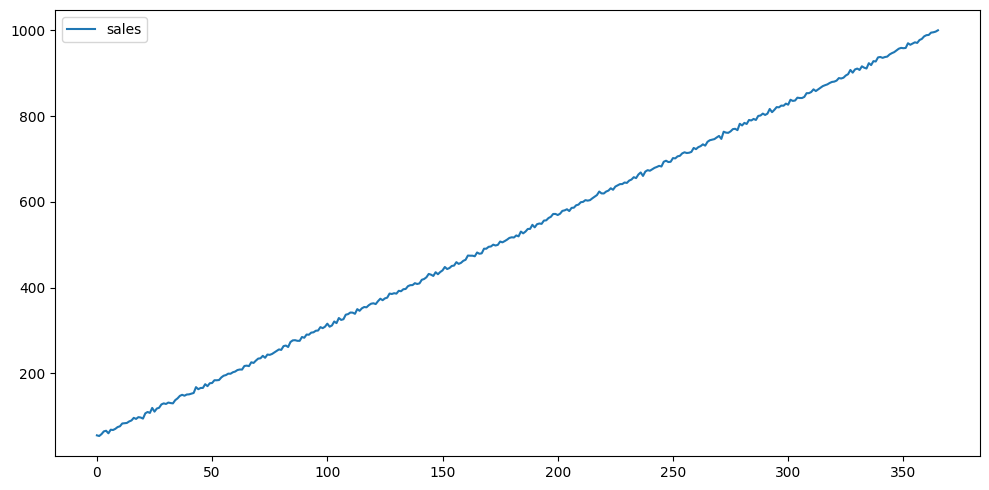

In [4]:
# Plot data to visualize:

fig, axis = plt.subplots(figsize = (10, 5))
# Insert the Data

sns.lineplot(data = total_data, color='red')


plt.tight_layout()
plt.show()

In [5]:
# transform dataset for analyzing, removing hours,  minutes and seconds
total_data['date'] = pd.to_datetime(total_data['date'])
total_data['date'] = total_data['date'].dt.date
total_data = total_data.set_index("date")

total_data

,sales
date,
2022-09-03,55.292157
2022-09-04,53.803211
2022-09-05,58.141693
2022-09-06,64.530899
2022-09-07,66.013633
...,...
2023-08-30,989.600354
2023-08-31,994.987326
2023-09-01,995.814415


In [6]:
# descomposing time serie
# minimum time unit = one day

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(total_data, period = 30)
decomposition

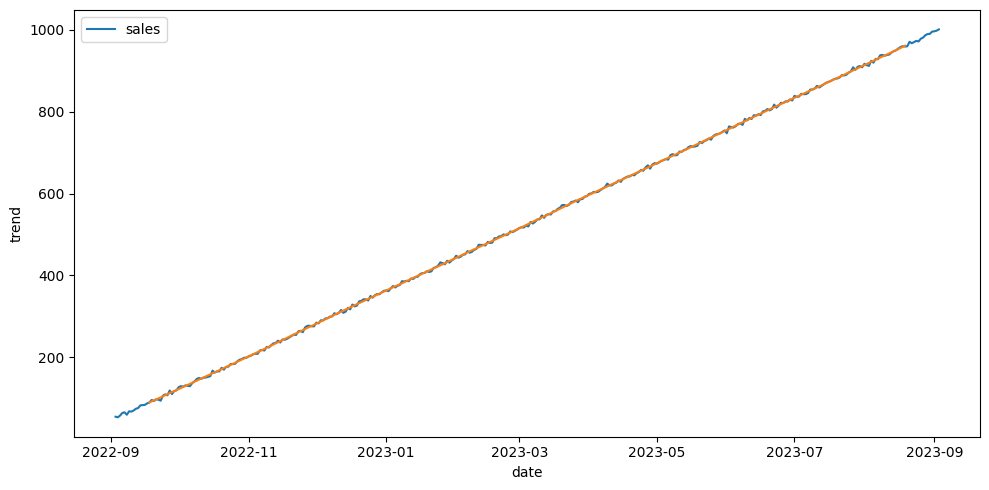

In [7]:
# wich is the trend?

trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = trend)

plt.tight_layout()

plt.show()

<p style="color: orange;">Positive trend over the years.</p>


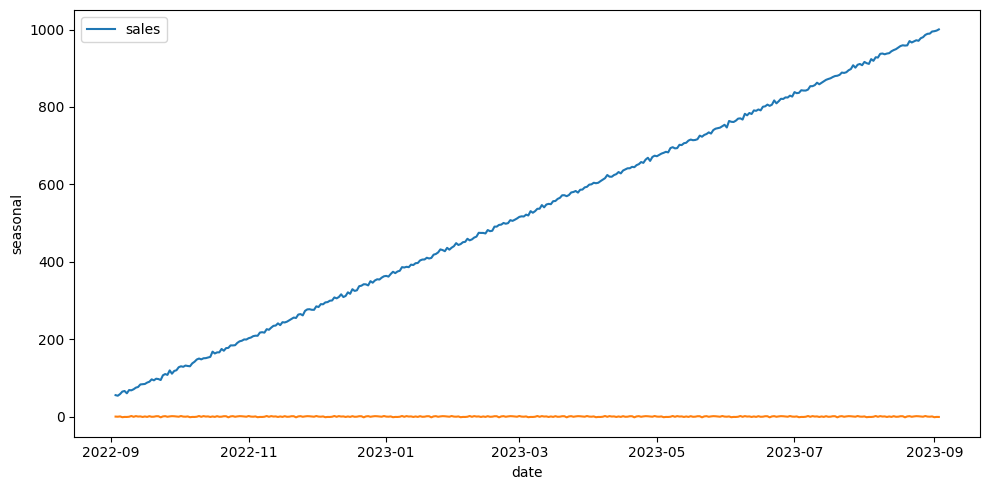

In [8]:
# Is it stationary?

seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = seasonal)

plt.tight_layout()

plt.show()

In [9]:

# Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    print("Resultados de la prueba de Dickey-Fuller:")
    dftest = adfuller(timeseries, autolag = "AIC")
    dfoutput = pd.Series(dftest[0:4], index = ["Test Statistic", "p-value", "#Lags Used", "Number of Observations Used"])
    for key,value in dftest[4].items():
        dfoutput["Critical Value (%s)"%key] = value
    return dfoutput

test_stationarity(total_data)

Resultados de la prueba de Dickey-Fuller:


Test Statistic                   0.545414
p-value                          0.986190
#Lags Used                      13.000000
Number of Observations Used    352.000000
Critical Value (1%)             -3.449065
Critical Value (5%)             -2.869786
Critical Value (10%)            -2.571163
dtype: float64

p-value is greater than 0.05, this means that our null hypothesis will be rejected and we will take this series as non-stationary

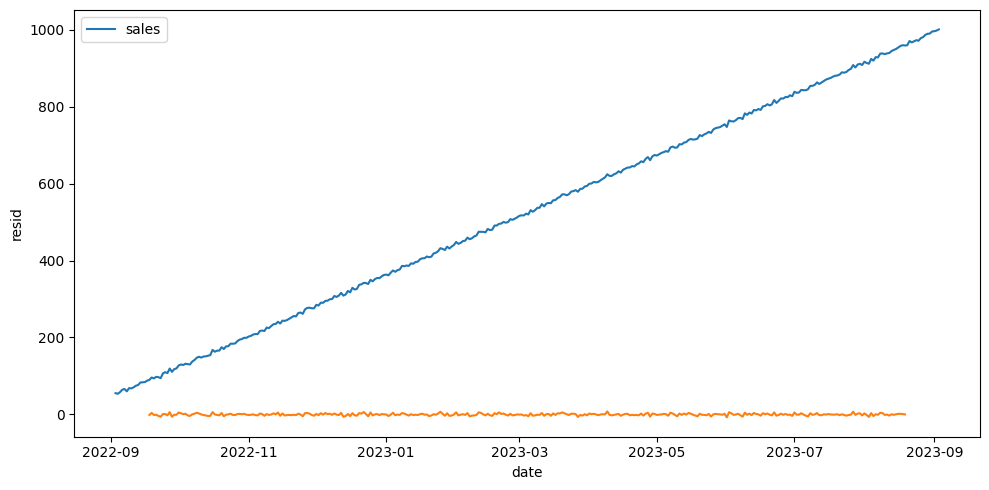

In [10]:
# Is there variability or noise?

residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = residual)

plt.tight_layout()

plt.show()

There is no great variability along the time

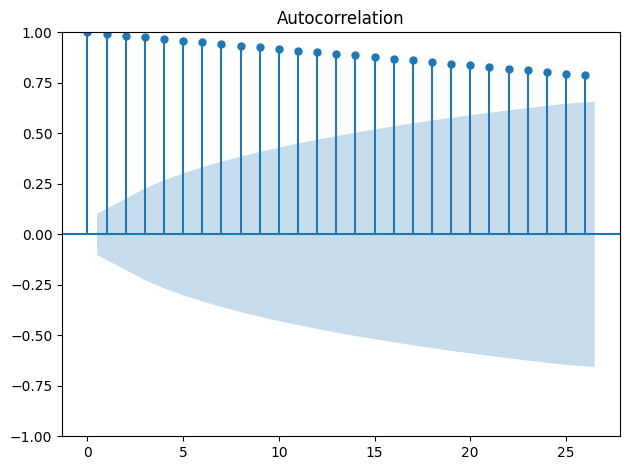

In [11]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(total_data)

plt.tight_layout()

plt.show()

Recent values are strongly correlated with past values, and this correlation decreases slowly over time.

In [17]:
# training an ARIMA

from pmdarima import auto_arima

model = auto_arima(total_data, seasonal = False, trace = True, m = 7)

/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (7) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1843.274, Time=0.78 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2096.542, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1970.972, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1839.586, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2209.657, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1839.552, Time=0.43 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=1841.532, Time=0.77 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=1843.586, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1839.607, Time=0.36 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1922.648, Time=0.15 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=inf, Time=0.53 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 3.785 seconds


best model ARIMA = ARIMA(1,1,1)

In [18]:
# predict the next 50 days

forecast = model.predict(60)
forecast

2023-09-04    1002.158148
2023-09-05    1004.831669
2023-09-06    1007.423289
2023-09-07    1010.021630
2023-09-08    1012.619419
2023-09-09    1015.217254
2023-09-10    1017.815084
2023-09-11    1020.412915
2023-09-12    1023.010746
2023-09-13    1025.608577
2023-09-14    1028.206409
2023-09-15    1030.804240
2023-09-16    1033.402071
2023-09-17    1035.999902
2023-09-18    1038.597733
2023-09-19    1041.195564
2023-09-20    1043.793395
2023-09-21    1046.391226
2023-09-22    1048.989057
2023-09-23    1051.586888
2023-09-24    1054.184719
2023-09-25    1056.782550
2023-09-26    1059.380381
2023-09-27    1061.978212
2023-09-28    1064.576043
2023-09-29    1067.173874
2023-09-30    1069.771705
2023-10-01    1072.369536
2023-10-02    1074.967367
2023-10-03    1077.565198
2023-10-04    1080.163029
2023-10-05    1082.760860
2023-10-06    1085.358691
2023-10-07    1087.956523
2023-10-08    1090.554354
2023-10-09    1093.152185
2023-10-10    1095.750016
2023-10-11    1098.347847
2023-10-12  

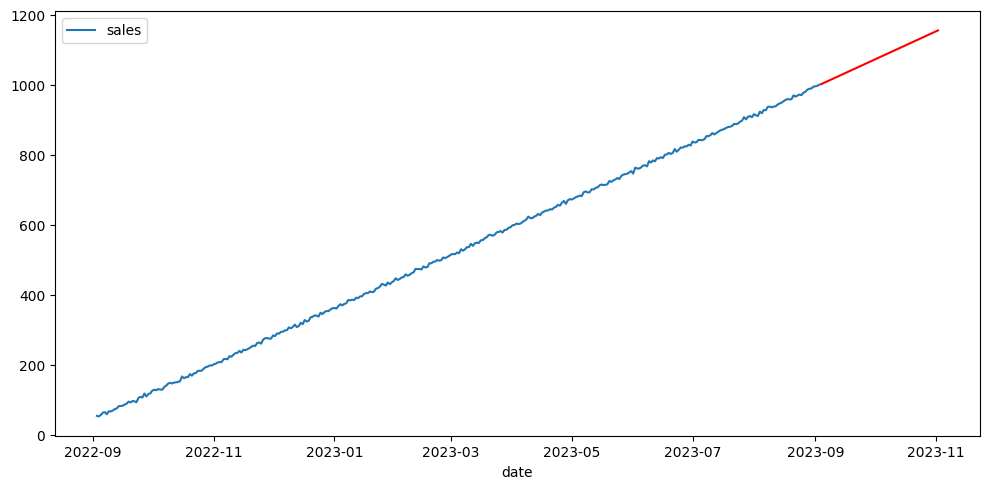

In [20]:
# visualization of the time series + prediction

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = total_data)
sns.lineplot(data = forecast, c = "red")

plt.tight_layout()

plt.show()